
# Basic Overview
The objective is to build go through data, find cases of missing/nan values and generate useful plots on the same.

Comments/criticisms/appreciations are greatly accepted and appreciated. Do not be shy and send me an email at babinu@gmail.com !

Source of data : https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np

In [3]:
train_data = pd.read_csv("../train.csv")

In [3]:
len(train_data)

891

## First things first : Validate the data, before inferring anything !!!

In [4]:
from IPython.display import display

In [5]:
def validate_data(train_data, survived=False):
    # Column passengerID
    print("Are there any null values in column 'PassengerId' ? ", train_data['PassengerId'].isnull().values.any())
    display(train_data[['PassengerId']].describe())

    print("Are the passengerid's consecutive integers starting from 1 : ", 
          not ((train_data['PassengerId'] - train_data.index) - 1).sum())

    # Check survived column
    if survived:
        print("Unique entries in the column 'Survived' : ", train_data['Survived'].unique())

    # Pclass should be having values only 1,2 or 3
    print("Unique entries in the column 'Pclass' : ", train_data['Pclass'].unique())

    # Validate name strings.
    print("Are there any null strings in column 'Name' ? ", 
          train_data['Name'].map(lambda x : len(x)).isnull().values.any())
    display(train_data[['Name']].applymap(lambda x : len(x)).describe())
    max_len = train_data['Name'].map(lambda x : len(x)).max()
    min_len = train_data['Name'].map(lambda x : len(x)).min()
    display("Entry with the shortest name : ", train_data[train_data['Name'].map(lambda x : len(x)) == min_len])
    display("Entry with the longest name : ", train_data[train_data['Name'].map(lambda x : len(x)) == max_len])

    # Sex : Nothing other than male/female
    print("Unique entries in the column 'Sex' : ", train_data['Sex'].unique())

    # Column Age
    print("Are there any null values in column 'Age' ? ", train_data['Age'].isnull().values.any())
    print("Number of nans in \'Age\' column : ",(train_data['Age'].isnull().values.sum()))
    display(train_data[['Age']].describe())
    display(train_data[train_data['Age'].isnull()].head())

    # SibSp column.
    print("Unique entries in the column 'SibSp' : ", train_data['SibSp'].unique())

    # Parch column.
    print("Unique entries in the column 'Parch' : ", train_data['Parch'].unique())

    # Ticket column 
    print("Are there any null strings in column 'Ticket' ? ", 
          train_data['Ticket'].map(lambda x : len(x)).isnull().values.any())
    display(train_data[['Ticket']].applymap(lambda x : len(x)).describe())
    max_len = train_data['Ticket'].map(lambda x : len(x)).max()
    min_len = train_data['Ticket'].map(lambda x : len(x)).min()
    display(train_data[train_data['Ticket'].map(lambda x : len(x)) == min_len])
    display(train_data[train_data['Ticket'].map(lambda x : len(x)) == max_len])

    # Check nan's in fare
    print("Are there any null values in column 'Fare' ? ", train_data['Fare'].isnull().values.any())
    display(train_data[['Fare']].describe())

    # IMP : Fare ==0 cases. Does not make sense.
    display(train_data[train_data['Fare'] == 0])

    # Only 3 passengers have extremely high fare of 512 -- > Does that make sense ?
    display(train_data[train_data['Fare'] > 300])

    # Cabin column
    print("Are there any null values in column 'Cabin' ? ", train_data['Cabin'].isnull().values.any())
    print("Number of nans in \'Cabin\' column : ",(train_data['Cabin'].isnull().values.sum()))
    cabin_not_null = train_data[train_data['Cabin'].notnull()]
    max_len = cabin_not_null['Cabin'].map(lambda x : len(x)).max()
    min_len = cabin_not_null['Cabin'].map(lambda x : len(x)).min()
    print(max_len, min_len)
    display("Entry with the shortest length of Cabin string : ", 
            cabin_not_null[cabin_not_null['Cabin'].map(lambda x : len(x)) == min_len])
    display("Entry with the longest length of Cabin string : ", 
            cabin_not_null[cabin_not_null['Cabin'].map(lambda x : len(x)) == max_len])

    # Embarked column.     
    print("Unique entries in the column 'Embarked' : ", train_data['Embarked'].unique())
    display("Number of nans in \'Embarked\' column : ", train_data['Embarked'].isnull().sum())

In [6]:
validate_data(train_data)

Are there any null values in column 'PassengerId' ?  False


,PassengerId
count,891.000000
mean,446.000000
std,257.353842
min,1.000000
25%,223.500000
50%,446.000000
75%,668.500000
max,891.000000


Are the passengerid's consecutive integers starting from 1 :  True
Unique entries in the column 'Pclass' :  [3 1 2]
Are there any null strings in column 'Name' ?  False


,Name
count,891.000000
mean,26.965208
std,9.281607
min,12.000000
25%,20.000000
50%,25.000000
75%,30.000000
max,82.000000


'Entry with the shortest name : '

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S


'Entry with the longest name : '

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9,C65,C


Unique entries in the column 'Sex' :  ['male' 'female']
Are there any null values in column 'Age' ?  True
Number of nans in 'Age' column :  177


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


Unique entries in the column 'SibSp' :  [1 0 3 4 2 5 8]
Unique entries in the column 'Parch' :  [0 1 2 5 3 4 6]
Are there any null strings in column 'Ticket' ?  False


,Ticket
count,891.000000
mean,6.750842
std,2.745515
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,18.000000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
545,546,0,1,"Nicholson, Mr. Arthur Ernest",male,64.0,0,0,693,26.0,NaN,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0,B51 B53 B55,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.05,NaN,S
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.05,NaN,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.05,NaN,S
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.05,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.05,NaN,S
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.05,NaN,S


Are there any null values in column 'Fare' ?  False


,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Are there any null values in column 'Cabin' ?  True
Number of nans in 'Cabin' column :  687
15 1


'Entry with the shortest length of Cabin string : '

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C


'Entry with the longest length of Cabin string : '

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C


Unique entries in the column 'Embarked' :  ['S' 'C' 'Q' nan]


"Number of nans in 'Embarked' column : "

2

### Can we summarize our findings and decide how to move forward  ?

In [7]:
# Summary of the problems in training data.
print("Total number of entries in training set is ", len(train_data),
      "\nNumber of entries with age as null is ", (train_data['Age'].isnull().values.sum()),
      "\nPercentage is ", (train_data['Age'].isnull().values.sum()) * 100.0/len(train_data))


print("Total number of entries in training set is ", len(train_data),
      "\nNumber of entries with cabin as null is ", (train_data['Cabin'].isnull().values.sum()),
      "\nPercentage is ", (train_data['Cabin'].isnull().values.sum()) * 100.0/len(train_data))


print("\nNumber of entries with either age and cabin as null is ", 
      ((train_data['Cabin'].isnull() | train_data['Age'].isnull()) .values.sum()))

print("\nNumber of entries with both age and cabin as null is ", 
      ((train_data['Cabin'].isnull() & train_data['Age'].isnull()) .values.sum()))

# Other data problems.
print("\nNumber of entries with fare =0.0  is ", ((train_data['Fare'] == 0).values.sum()))
display(train_data[(train_data['Fare'] == 0) & (train_data['Age'].notnull()) & (train_data['Cabin'].notnull())])

print("Entries with Embarked as nan in data \n")
display(train_data[train_data['Embarked'].isnull()])

# Based on all these , we do the follwoing :
# 1. 77% of the data is having 'Cabin' as Nan, hence we do not use this column.
# 2. 19% of the data is having 'Age' as Nan, hence let us delete these data points for now.
# 3. Apart from the cases mentioned above, we have 2 cases with fare=0 and another 2 with boarding point=Nan. 
# Let us ignore these  cases for now as well.
# Taking into account all these, the number of clean data points available to us would be 
# 891 - 177 - 2 -2 = 710(79.68% of the data)

Total number of entries in training set is  891 
Number of entries with age as null is  177 
Percentage is  19.865319865319865
Total number of entries in training set is  891 
Number of entries with cabin as null is  687 
Percentage is  77.10437710437711

Number of entries with either age and cabin as null is  706

Number of entries with both age and cabin as null is  158

Number of entries with fare =0.0  is  15


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S


Entries with Embarked as nan in data 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
test_data = pd.read_csv("../test.csv")

### Let us do a validation of test data as well !

In [9]:
validate_data(test_data)

Are there any null values in column 'PassengerId' ?  False


,PassengerId
count,418.000000
mean,1100.500000
std,120.810458
min,892.000000
25%,996.250000
50%,1100.500000
75%,1204.750000
max,1309.000000


Are the passengerid's consecutive integers starting from 1 :  False
Unique entries in the column 'Pclass' :  [3 2 1]
Are there any null strings in column 'Name' ?  False


,Name
count,418.000000
mean,27.483254
std,9.971228
min,13.000000
25%,20.000000
50%,25.000000
75%,30.750000
max,63.000000


'Entry with the shortest name : '

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
334,1226,3,"Cor, Mr. Ivan",male,27.0,0,0,349229,7.8958,NaN,S


'Entry with the longest name : '

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
397,1289,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C


Unique entries in the column 'Sex' :  ['male' 'female']
Are there any null values in column 'Age' ?  True
Number of nans in 'Age' column :  86


,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S


Unique entries in the column 'SibSp' :  [0 1 2 3 4 5 8]
Unique entries in the column 'Parch' :  [0 1 3 2 4 6 5 9]
Are there any null strings in column 'Ticket' ?  False


,Ticket
count,418.000000
mean,6.875598
std,2.821437
min,3.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,18.000000


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0,NaN,S
378,1270,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0,C39,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
42,934,3,"Goldsmith, Mr. Nathan",male,41.00,0,0,SOTON/O.Q. 3101263,7.850,NaN,S
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.00,0,2,SOTON/O.Q. 3101315,13.775,NaN,S
211,1103,3,"Finoli, Mr. Luigi",male,NaN,0,0,SOTON/O.Q. 3101308,7.050,NaN,S
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
286,1178,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.250,NaN,S
325,1217,3,"Assam, Mr. Ali",male,23.00,0,0,SOTON/O.Q. 3101309,7.050,NaN,S
409,1301,3,"Peacock, Miss. Treasteall",female,3.00,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.250,NaN,S


Are there any null values in column 'Fare' ?  True


,Fare
count,417.000000
mean,35.627188
std,55.907576
min,0.000000
25%,7.895800
50%,14.454200
75%,31.500000
max,512.329200


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Are there any null values in column 'Cabin' ?  True
Number of nans in 'Cabin' column :  327
15 1


'Entry with the shortest length of Cabin string : '

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
109,1001,2,"Swane, Mr. George",male,18.5,0,0,248734,13.0000,F,S
301,1193,2,"Malachard, Mr. Noel",male,NaN,0,0,237735,15.0458,D,C


'Entry with the longest length of Cabin string : '

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B57 B59 B63 B66,C


Unique entries in the column 'Embarked' :  ['Q' 'S' 'C']


"Number of nans in 'Embarked' column : "

0

### What can we find from test data ?

In [10]:
# Summary of the problems in test data.
print("Total number of entries in test set is ", len(test_data),
      "\nNumber of entries with age as null is ", (test_data['Age'].isnull().values.sum()),
      "\nPercentage is ", (test_data['Age'].isnull().values.sum()) * 100.0/len(test_data))


print("Total number of entries in test set is ", len(test_data),
      "\nNumber of entries with cabin as null is ", (test_data['Cabin'].isnull().values.sum()),
      "\nPercentage is ", (test_data['Cabin'].isnull().values.sum()) * 100.0/len(test_data))


print("\nNumber of entries with either age and cabin as null is ", 
      ((test_data['Cabin'].isnull() | test_data['Age'].isnull()) .values.sum()))

print("\nNumber of entries with both age and cabin as null is ", 
      ((test_data['Cabin'].isnull() & test_data['Age'].isnull()) .values.sum()))

# Other data problems.
print("\nNumber of entries with fare as null  is ", ((test_data['Fare'].isnull()).values.sum()))
print("\nNumber of entries with fare =0.0  is ", ((test_data['Fare'] == 0).values.sum()))
display(test_data[(test_data['Fare'] == 0) & (test_data['Age'].notnull()) & (test_data['Cabin'].notnull())])
display(test_data[(test_data['Fare'].isnull()) & (test_data['Age'].notnull()) & (test_data['Cabin'].notnull())])

print("Entries with Embarked as nan in data \n")
display(test_data[test_data['Embarked'].isnull()])

# Based on all these , we have the follwoing :
# 1. 78% of the data is having 'Cabin' as Nan, hence we do not use this column.
# 2. 20% of the data is having 'Age' as Nan, hence let us delete these data points for now.
# 3. Apart from the cases mentioned above, we have 1 case with fare=0 
# Let us ignore this  case for now as well.


# Let us have the following plan .
# 1. Ignore entries with fare=0 (2 in the training set and one in the test set)
# 2. Create a model with the training set where 'Age' is not Nan and predict values for the cases
#    in test set where Age is not 'Nan'
# 3. Ignore 'Age' and create a model on the entire training set. Use it to predict values for the cases
#    in the test set where Age = 'Nan'

Total number of entries in test set is  418 
Number of entries with age as null is  86 
Percentage is  20.574162679425836
Total number of entries in test set is  418 
Number of entries with cabin as null is  327 
Percentage is  78.22966507177034

Number of entries with either age and cabin as null is  331

Number of entries with both age and cabin as null is  82

Number of entries with fare as null  is  1

Number of entries with fare =0.0  is  2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Entries with Embarked as nan in data 



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Does the 'Name' column signify anything ? Can we look more into it ?

In [11]:
train_data[['Name']].describe()

,Name
count,891
unique,891
top,"Lefebre, Miss. Jeannie"
freq,1


In [14]:
# We do not look to be getting much use from the  'Name' column as they unique for each data entry and hence does not give us any predictive power.


### What about the 'Ticket' column ?

In [12]:
display(train_data[['Ticket']].describe())
display(train_data[['Ticket']].head())

,Ticket
count,891
unique,681
top,347082
freq,7


,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450


In [14]:
# We are not quite sure, but to start with, let us add a variable which indicates whether the ticket
# has an alphabet or not.
train_data['TicketNumericOrNot'] = train_data['Ticket'].map(lambda x : x.isnumeric())


In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
import matplotlib.pyplot as plt

In [16]:
# Modularizing fare plotting for ease of use later on.
def plot_fare_distribution(series_data,
                           class_num,
                           x_lim=512,
                           y_lim=50,
                           x_ticks=50,
                           y_ticks=5,
                           num_bins=100,
                           x_label='Fare Value',
                           y_label='Number of passengers',
                           title='Distribution of number of passengers per fare for class : '
                          ):

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(1, 1, 1)
    series_data.plot.hist(ax=ax, bins=100)
    ax.set_xlabel('Fare Value')
    ax.set_ylabel('Number of passengers')
    ax.set_xticks(np.arange(0, x_lim, x_ticks))
    ax.set_yticks(np.arange(0, y_lim, y_ticks))
    ax.set_title(title + str(class_num))
    return ax

<a id='train_data_class_1'></a>

,Fare
count,216.000000
mean,84.154687
std,78.380373
min,0.000000
25%,30.923950
50%,60.287500
75%,93.500000
max,512.329200


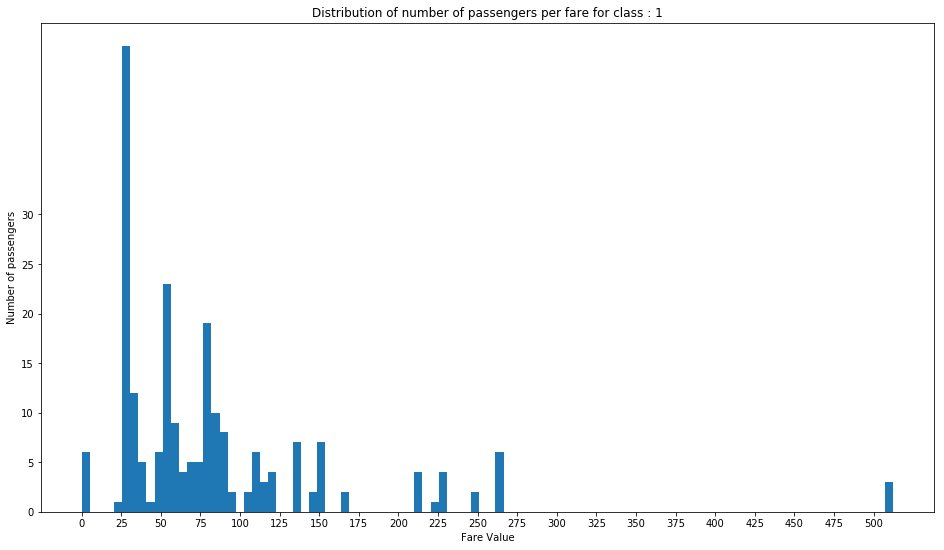

In [18]:
# Summarize and plot for class 1
display(train_data[train_data['Pclass'] == 1][['Fare']].describe())
plot_fare_distribution(train_data[train_data['Pclass'] == 1]['Fare'],
                      1,
                      512,
                      35,
                      25)

### What can we infer from the distribution ? Does everything look okay ?

In [20]:
# Some fares look simply too low to be in first class.
len(train_data[(train_data['Pclass'] == 1) & (train_data['Fare'] < 40)])

# To summarize the entry corresponding to a fare of 5 and passenger class of 1 looks to be plainly wrong.
# Otherwise , things look reasonable , but there looks to be lots of entries with very high value of ticket price.
# Should we model them separately ? Let us keep it as it is for now.

70

### Is that the same way , we see in our test set as well ?

,Fare
count,107.000000
mean,94.280297
std,84.435858
min,0.000000
25%,30.100000
50%,60.000000
75%,134.500000
max,512.329200


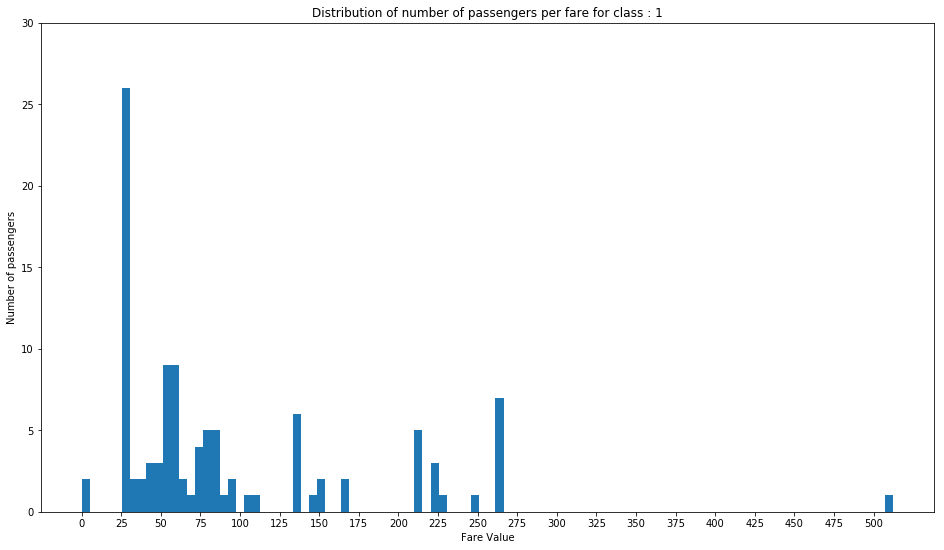

In [21]:
# Summarize and plot for class 1
display(test_data[test_data['Pclass'] == 1][['Fare']].describe())
plot_fare_distribution(test_data[test_data['Pclass'] == 1]['Fare'],
                      1,
                      512,
                      35,
                      25
                      )

In [25]:
(test_data[(test_data['Pclass'] == 1) & (test_data['Fare'] < 10)])

# We see couple of entries with ticket fare=0.0 for pclass=1 in the test set as well. Rest looks reasonable.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S


<a id='train_data_class_2'></a>

,Fare
count,173.000000
mean,21.471556
std,13.187429
min,10.500000
25%,13.000000
50%,15.045800
75%,26.000000
max,73.500000


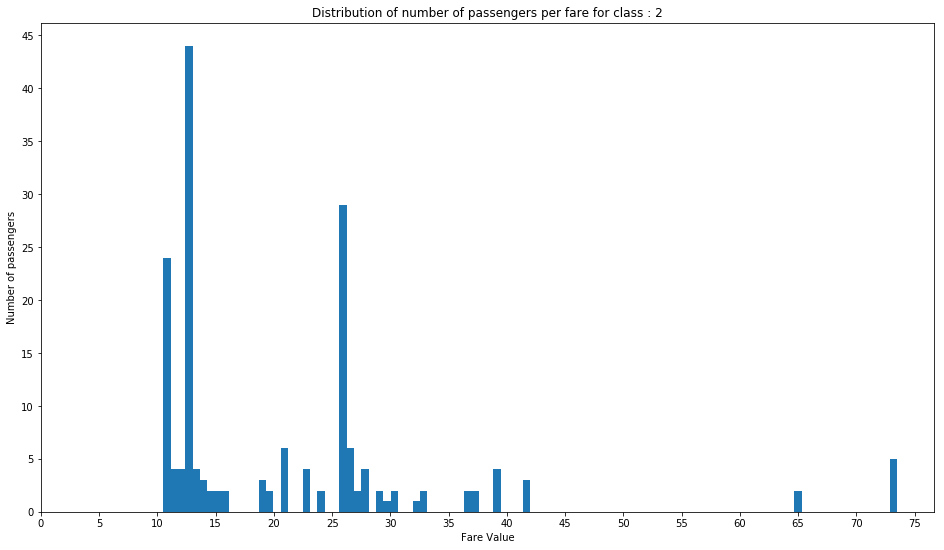

In [26]:
# Summarize and plot for class 2
display(clean_training_data_v2[clean_training_data_v2['Pclass'] == 2][['Fare']].describe())
plot_fare_distribution(clean_training_data_v2[clean_training_data_v2['Pclass'] == 2]['Fare'],
                      2,
                      80,
                      50,
                      5,
                      5)

In [27]:
# Comment : The values look reasonable in general.

,Fare
count,93.000000
mean,22.202104
std,13.991877
min,9.687500
25%,13.000000
50%,15.750000
75%,26.000000
max,73.500000


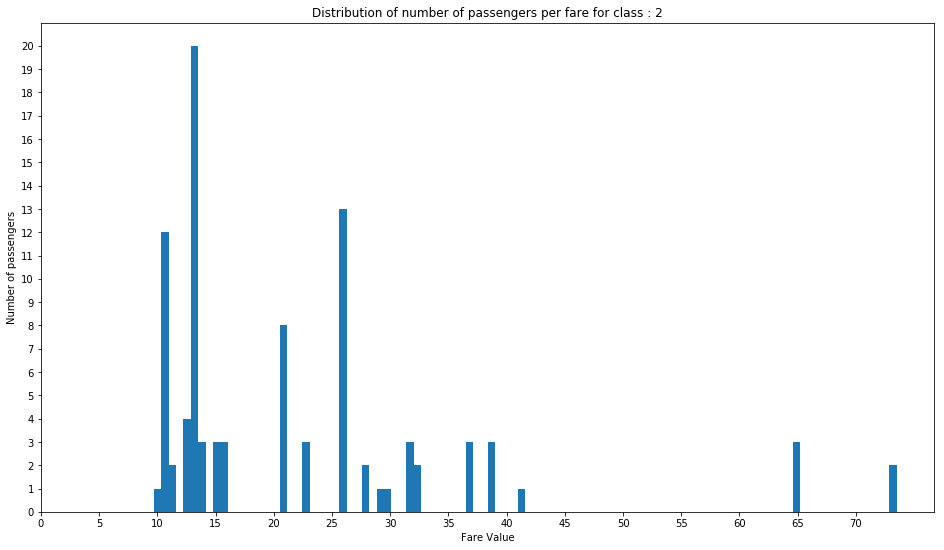

In [28]:
# Summarize and plot for class 2 (test_data)
display(test_data[test_data['Pclass'] == 2][['Fare']].describe())
plot_fare_distribution(test_data[test_data['Pclass'] == 2]['Fare'],
                      2,
                      75,
                      21,
                      5,
                      1)

In [29]:
# Comment : The stats look reasonable for test data for class 2 as well.

<a id='train_data_class_3'></a>

,Fare
count,351.000000
mean,13.380198
std,9.999739
min,4.012500
25%,7.775000
50%,8.050000
75%,15.795850
max,56.495800


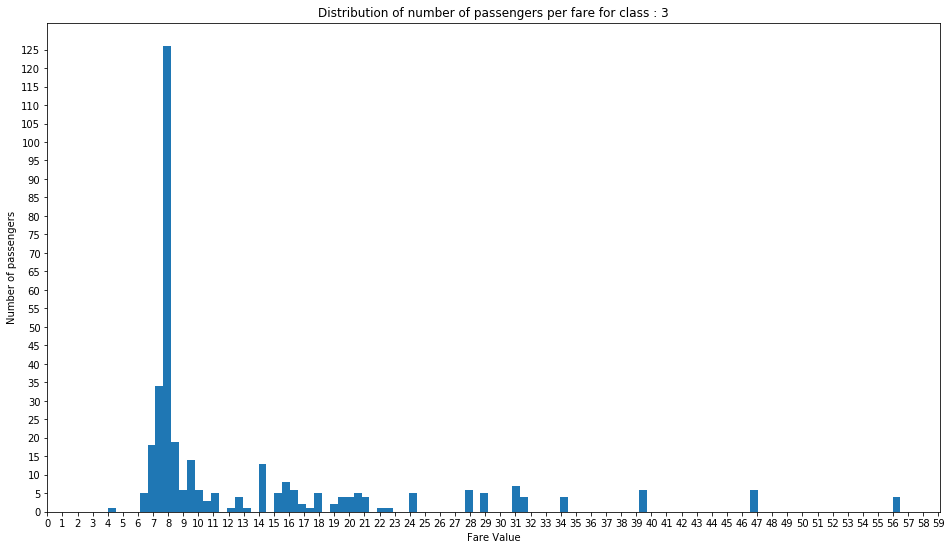

In [30]:
# Summarize and plot for class 3
display(clean_training_data_v2[clean_training_data_v2['Pclass'] == 3][['Fare']].describe())
plot_fare_distribution(clean_training_data_v2[clean_training_data_v2['Pclass'] == 3]['Fare'],
                      3,
                      60,
                      130,
                      1,
                      5)

,Fare
count,217.000000
mean,12.459678
std,10.803698
min,3.170800
25%,7.750000
50%,7.895800
75%,14.400000
max,69.550000


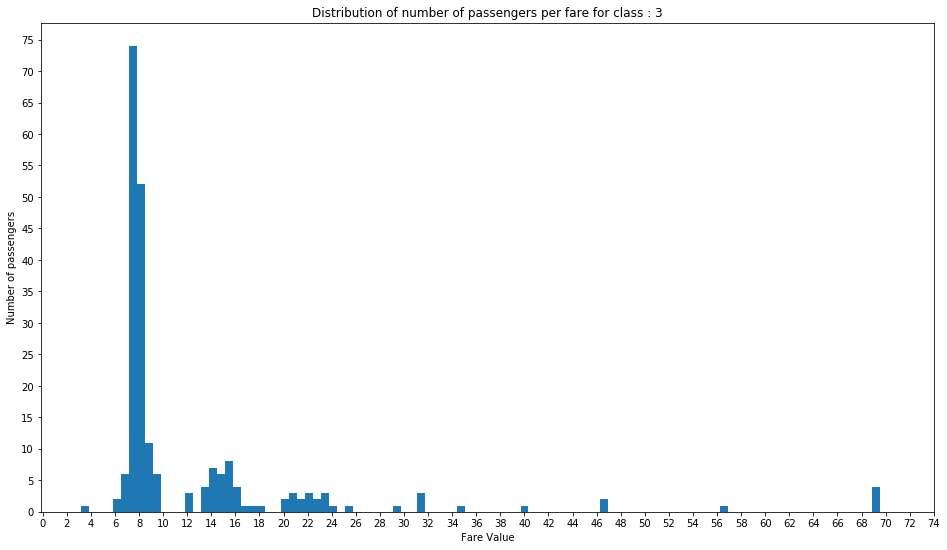

In [31]:
# Summarize and plot for class 3 (test data)
display(test_data[test_data['Pclass'] == 3][['Fare']].describe())
plot_fare_distribution(test_data[test_data['Pclass'] == 3]['Fare'],
                      3,
                      75,
                      80,
                      2,
                      5)

### After going through all classes of data, what are our conclusions ? Is the data good enough to be used in the model ?

#### There looks to be several issues here. 

In [32]:
# Several cases where third class tickets are more expensive than first class !
first_class_prices = np.sort(clean_training_data_v2[clean_training_data_v2['Pclass'] == 1]['Fare'].values)
second_class_prices = np.sort(clean_training_data_v2[clean_training_data_v2['Pclass'] == 2]['Fare'].values)
third_class_prices = np.sort(clean_training_data_v2[clean_training_data_v2['Pclass'] == 3]['Fare'].values)

In [33]:
print((third_class_prices > 30).sum(), len(third_class_prices))

31 351


In [34]:
print((first_class_prices < 30).sum(), len(first_class_prices))

30 181


In [35]:
## Approximately 9% of third class tickets are more expensive than 16% of first class tickets. Is this acceptable ?

### Thus, we may want to be some more processing before we can start using this data. We may want to cap
### some ticket prices per class to make sure that they look sensible.

In [36]:
clean_training_data_v3 = clean_training_data_v2.drop(columns=['Fare'])

In [37]:
clean_training_data_v3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,TicketNumericOrNot
0,1,0,3,male,22.0,1,0,S,False
1,2,1,1,female,38.0,1,0,C,False
2,3,1,3,female,26.0,0,0,S,False
3,4,1,1,female,35.0,1,0,S,True
4,5,0,3,male,35.0,0,0,S,True


In [38]:
clean_training_data_v3.isnull().any()

PassengerId           False
Survived              False
Pclass                False
Sex                   False
Age                   False
SibSp                 False
Parch                 False
Embarked              False
TicketNumericOrNot    False
dtype: bool

### Now, that we have come to model building, where do we start ? Can we start with a simple binary logistic regression (classfication) ?

#### Yes we can. We can also apply several other methods and we will be using the same in separate notebooks.